## Combine all arrests data & created the Reoffender feature

In [9]:
import pandas as pd
import numpy as np

# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)  # Ensures all columns are displayed

arrests_2015 = pd.read_csv("2015_Arrests.csv")
arrests_2016 = pd.read_csv("2016_Arrests.csv")
arrests_2017 = pd.read_csv("2017_Arrests.csv")
arrests_2018 = pd.read_csv("2018Arrests_YTD_0_2.csv")
arrests_2019 = pd.read_csv("2019Arrests_YTD_0_2.csv")
arrests_2020 = pd.read_csv("2020_Arrests_0_3.csv")
arrests_2021 = pd.read_csv("2021Arrests_YTD_0_3.csv")
arrests_2022 = pd.read_csv("2022Arrests_YTD_0_2.csv")
arrests_2023 = pd.read_csv("2023_Arrests_0_1.csv")
arrests_2024 = pd.read_csv("2024Arrests_YTD_0_3.csv")

combined_arrests = pd.concat(
    [
        arrests_2015,
        arrests_2016,
        arrests_2017,
        arrests_2018,
        arrests_2019,
        arrests_2020,
        arrests_2021,
        arrests_2022,
        arrests_2023,
        arrests_2024,
    ]
)

name_id = combined_arrests[["Name_ID"]]
repeats = name_id["Name_ID"].value_counts()
repeat_offenders = repeats[repeats > 1]

print(
    f"Reoffenders: {len(repeat_offenders)} \n Total: {len(combined_arrests)} \n Percentage: {len(repeat_offenders) / len(combined_arrests)}"
)

combined_arrests["Reoffender"] = np.where(
    combined_arrests["Name_ID"].isin(repeat_offenders.index), 1, 0
)
# Drop duplicates after creating the Reoffender feature
combined_arrests = combined_arrests.drop_duplicates(subset=["Name_ID"])
print(len(combined_arrests), len(combined_arrests[combined_arrests["Reoffender"] == 1]))

combined_arrests.to_csv("combined_arrests.csv", index=False)

Reoffenders: 7592 
 Total: 49614 
 Percentage: 0.1530213246261136
28506 7592


## Data Cleaning + Preprocessing + Feature Engineering

In [10]:
import pandas as pd
arrest_data = pd.read_csv("combined_arrests.csv")
arrest_data.head()

,FID,ArrestID,Arrest_Dat,ArrestTime,streetnbr,street,city,state,zip,Name_ID,...,sex,Team,Beat,X,Y,recblock,charge,x2,y2,Reoffender
0,1,59916,7/26/15,254,29,MAGNOLIA RD/TALL OAK AVE,CHARLESTON,SC,29407,157815,...,M,T4,425,2311413.50,346924.91,,SIMPLE POSS MARIJUANA 1ST,NaN,NaN,0
1,2,63352,12/15/15,2320,1,SPRING ST/MEETING ST,CHARLESTON,SC,29403,28389,...,M,T1,122,2325981.75,351230.28,,OPEN CONTAINER ALCOHOL,NaN,NaN,1
2,3,59917,7/26/15,327,0,SC30/CALHOUN ST RAMP,CHARLESTON,SC,29401,330070,...,M,T2,224,2322320.50,346668.19,,DUI 2ND,NaN,NaN,0
3,4,63353,12/16/15,47,0,MAIN RD/CHISOLM RD,CHARLESTON COUNTY,SC,29455,39583,...,M,T4,433,2274725.50,345153.09,,PWID/MANUF COCAINE,NaN,NaN,1
4,5,59919,7/26/15,947,98,HANOVER ST/LEE ST,CHARLESTON,SC,29403,172212,...,M,T1,125,2325832.75,353010.72,,PETIT LARCENY,NaN,NaN,1


In [11]:
import re

# Define a function to classify charge types based on keywords
def classify_charge(charge):
    if pd.isna(charge):
        return "Unclassified"

    charge = charge.lower()

    # Violent Crimes
    if re.search(r'\b(assault|battery|homicide|murder|manslaughter|kidnapping|strangulation|attempted murder|domestic violence|armed with intent)\b', charge):
        return "Violent Crime"
    # Property Crimes
    elif re.search(r'\b(theft|larceny|burglary|robbery|shoplifting|arson|vandalism|trespass|stolen property|possession of stolen)\b', charge):
        return "Property Crime"
    # Drug Offenses
    elif re.search(r'\b(drug|marijuana|cocaine|heroin|meth|narcotic|controlled substance|possession.*drug|paraphernalia|intent to distribute|opioid|suboxone|fentanyl)\b', charge):
        return "Drug Offense"
    # Weapon Offenses
    elif re.search(r'\b(weapon|firearm|gun|concealed|unlawful possession.*firearm|illegal possession.*weapon|discharge|brandishing)\b', charge):
        return "Weapon Offense"
    # Sex Offenses
    elif re.search(r'\b(rape|sexual abuse|molestation|indecent exposure|sex offender|child pornography|lewd|sodomy|forcible touching)\b', charge):
        return "Sex Offense"
    # Traffic / Driving Offenses
    elif re.search(r'\b(dui|dwi|driving while intoxicated|reckless driving|no license|suspended license|traffic|hit and run|eluding|drag racing|speeding)\b', charge):
        return "Traffic Offense"
    # Public Order / Conduct Offenses
    elif re.search(r'\b(disorderly conduct|resisting arrest|public intoxication|obstruction|disturbance|loitering|harassment|failure to comply|interference)\b', charge):
        return "Public Order Offense"
    # Fraud / White Collar Crimes
    elif re.search(r'\b(fraud|embezzlement|forgery|identity theft|counterfeit|bribery|money laundering|financial)\b', charge):
        return "Fraud/White Collar"
    # Default catch-all
    else:
        return "Other / Unclassified"

arrest_data['charge_category'] = arrest_data['charge'].apply(classify_charge)
arrest_data.head()

,FID,ArrestID,Arrest_Dat,ArrestTime,streetnbr,street,city,state,zip,Name_ID,...,Team,Beat,X,Y,recblock,charge,x2,y2,Reoffender,charge_category
0,1,59916,7/26/15,254,29,MAGNOLIA RD/TALL OAK AVE,CHARLESTON,SC,29407,157815,...,T4,425,2311413.50,346924.91,,SIMPLE POSS MARIJUANA 1ST,NaN,NaN,0,Drug Offense
1,2,63352,12/15/15,2320,1,SPRING ST/MEETING ST,CHARLESTON,SC,29403,28389,...,T1,122,2325981.75,351230.28,,OPEN CONTAINER ALCOHOL,NaN,NaN,1,Other / Unclassified
2,3,59917,7/26/15,327,0,SC30/CALHOUN ST RAMP,CHARLESTON,SC,29401,330070,...,T2,224,2322320.50,346668.19,,DUI 2ND,NaN,NaN,0,Traffic Offense
3,4,63353,12/16/15,47,0,MAIN RD/CHISOLM RD,CHARLESTON COUNTY,SC,29455,39583,...,T4,433,2274725.50,345153.09,,PWID/MANUF COCAINE,NaN,NaN,1,Drug Offense
4,5,59919,7/26/15,947,98,HANOVER ST/LEE ST,CHARLESTON,SC,29403,172212,...,T1,125,2325832.75,353010.72,,PETIT LARCENY,NaN,NaN,1,Property Crime


In [12]:
print(arrest_data["race"].value_counts())
print(arrest_data["sex"].value_counts())

race
W    14848
B    13477
A      133
I       35
U       10
         2
O        1
Name: count, dtype: int64
sex
M    20996
F     7509
         1
Name: count, dtype: int64


In [13]:
arrest_data = arrest_data[arrest_data["sex"].isin(["M", "F"])]
arrest_data = arrest_data[arrest_data["race"].isin(["B", "W", "A", "I", "U"])]

In [14]:
arrest_data["age_group"] = pd.cut(arrest_data["age"], 
                                 bins=[0, 20, 30, 40, 60, 100], 
                                 labels=["0-20", "21-30", "31-40", "41-60", "61+"])

In [15]:
print(arrest_data["age_group"].value_counts())
print(arrest_data["sex"].value_counts())
print(arrest_data["race"].value_counts())

age_group
21-30    9761
31-40    6219
0-20     5825
41-60    5747
61+       951
Name: count, dtype: int64
sex
M    20994
F     7509
Name: count, dtype: int64
race
W    14848
B    13477
A      133
I       35
U       10
Name: count, dtype: int64


In [16]:
arrest_data["hour"] = pd.to_datetime(
    arrest_data["ArrestTime"].astype(str).str.zfill(4), 
    format="%H%M", errors="coerce"
).dt.hour

arrest_data["time_of_day"] = pd.cut(
    arrest_data["hour"],
    bins=[-1, 5, 11, 17, 21, 24],
    labels=["Night", "Morning", "Afternoon", "Evening", "Night"],
    ordered=False
)

print(arrest_data["time_of_day"].value_counts())

time_of_day
Night        12342
Afternoon     6435
Evening       5493
Morning       4233
Name: count, dtype: int64


In [17]:
arrest_data.head()

,FID,ArrestID,Arrest_Dat,ArrestTime,streetnbr,street,city,state,zip,Name_ID,...,Y,recblock,charge,x2,y2,Reoffender,charge_category,age_group,hour,time_of_day
0,1,59916,7/26/15,254,29,MAGNOLIA RD/TALL OAK AVE,CHARLESTON,SC,29407,157815,...,346924.91,,SIMPLE POSS MARIJUANA 1ST,NaN,NaN,0,Drug Offense,21-30,2,Night
1,2,63352,12/15/15,2320,1,SPRING ST/MEETING ST,CHARLESTON,SC,29403,28389,...,351230.28,,OPEN CONTAINER ALCOHOL,NaN,NaN,1,Other / Unclassified,61+,23,Night
2,3,59917,7/26/15,327,0,SC30/CALHOUN ST RAMP,CHARLESTON,SC,29401,330070,...,346668.19,,DUI 2ND,NaN,NaN,0,Traffic Offense,21-30,3,Night
3,4,63353,12/16/15,47,0,MAIN RD/CHISOLM RD,CHARLESTON COUNTY,SC,29455,39583,...,345153.09,,PWID/MANUF COCAINE,NaN,NaN,1,Drug Offense,0-20,0,Night
4,5,59919,7/26/15,947,98,HANOVER ST/LEE ST,CHARLESTON,SC,29403,172212,...,353010.72,,PETIT LARCENY,NaN,NaN,1,Property Crime,0-20,9,Morning


In [18]:
arrest_data = arrest_data[["race", "sex", "age_group", "time_of_day", "Reoffender"]]
arrest_data.head()

,race,sex,age_group,time_of_day,Reoffender
0,B,M,21-30,Night,0
1,B,M,61+,Night,1
2,W,M,21-30,Night,0
3,B,M,0-20,Night,1
4,B,M,0-20,Morning,1


In [19]:
arrest_data = arrest_data[["race", "sex", "age_group", "time_of_day", "Reoffender"]]
arrest_data = pd.get_dummies(arrest_data, columns=['race', 'age_group', 'time_of_day'], drop_first=True, prefix=['race', 'age_group', 'time_of_day'])
arrest_data["sex"] = arrest_data["sex"].map({'M': 1, 'F': 0})
arrest_data.head()

,sex,Reoffender,race_B,race_I,race_U,race_W,age_group_21-30,age_group_31-40,age_group_41-60,age_group_61+,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,1,0,True,False,False,False,True,False,False,False,False,False,True
1,1,1,True,False,False,False,False,False,False,True,False,False,True
2,1,0,False,False,False,True,True,False,False,False,False,False,True
3,1,1,True,False,False,False,False,False,False,False,False,False,True
4,1,1,True,False,False,False,False,False,False,False,False,True,False


In [20]:
arrest_data.to_csv("combined_arrests2.csv", index=False)

In [21]:
arrest_data.corr()

,sex,Reoffender,race_B,race_I,race_U,race_W,age_group_21-30,age_group_31-40,age_group_41-60,age_group_61+,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
sex,1.000000,0.108976,0.062768,-0.006321,-0.001555,-0.060959,0.007972,0.025141,0.060153,0.036161,-0.005228,-0.011833,0.011324
Reoffender,0.108976,1.000000,0.185485,-0.007527,-0.007049,-0.181337,-0.022509,-0.019652,0.037476,-0.010286,0.013299,0.037643,-0.109398
race_B,0.062768,0.185485,1.000000,-0.033207,-0.017742,-0.987559,0.027801,-0.034967,-0.003913,0.013438,0.012963,0.077765,-0.155528
race_I,-0.006321,-0.007527,-0.033207,1.000000,-0.000657,-0.036563,-0.004193,0.013010,-0.005136,-0.000936,0.003187,-0.003375,-0.002336
race_U,-0.001555,-0.007049,-0.017742,-0.000657,1.000000,-0.019535,0.002272,0.003711,-0.004745,-0.003481,0.005096,0.002713,-0.008810
race_W,-0.060959,-0.181337,-0.987559,-0.036563,-0.019535,1.000000,-0.027642,0.032878,0.005291,-0.012280,-0.012901,-0.077434,0.154169
age_group_21-30,0.007972,-0.022509,0.027801,-0.004193,0.002272,-0.027642,1.000000,-0.381244,-0.362670,-0.134077,-0.036946,-0.044620,0.124656
age_group_31-40,0.025141,-0.019652,-0.034967,0.013010,0.003711,0.032878,-0.381244,1.000000,-0.265483,-0.098147,0.011521,-0.006351,0.002937
age_group_41-60,0.060153,0.037476,-0.003913,-0.005136,-0.004745,0.005291,-0.362670,-0.265483,1.000000,-0.093365,0.039120,0.039224,-0.105445
age_group_61+,0.036161,-0.010286,0.013438,-0.000936,-0.003481,-0.012280,-0.134077,-0.098147,-0.093365,1.000000,0.019181,0.021297,-0.068915


# Model Assembling

In [22]:
import pandas as pd

processed_data = pd.read_csv("combined_arrests2.csv")
processed_data = processed_data.drop(columns=["race_W"])

reoffenders = processed_data[processed_data['Reoffender'] == 1]
non_reoffenders = processed_data[processed_data['Reoffender'] == 0]

n_reoffenders = len(reoffenders)

n_non_reoffenders_to_sample = int(n_reoffenders * 1.06)
balanced_non_reoffenders = non_reoffenders.sample(n=n_non_reoffenders_to_sample, random_state=42)

balanced_data = pd.concat([reoffenders, balanced_non_reoffenders])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution in the new dataset
print("\nClass distribution in balanced dataset:")
print(balanced_data['Reoffender'].value_counts())
print("\nPercentage distribution:")
print(balanced_data['Reoffender'].value_counts(normalize=True) * 100)


X = balanced_data.drop(columns=["Reoffender"])
y = balanced_data['Reoffender']


Class distribution in balanced dataset:
Reoffender
0    8046
1    7591
Name: count, dtype: int64

Percentage distribution:
Reoffender
0    51.454883
1    48.545117
Name: proportion, dtype: float64


### XGBoost Model

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, recall_score, confusion_matrix, precision_score, accuracy_score
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weight to handle imbalanced data
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Model Tuning
xgb_tuning_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [scale_pos_weight],
    'reg_lambda': [1.0],
    "gamma": [0, 0.1, 0.2]
}

# Split data into training and validation sets for early stopping
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=42)

# Create model with early stopping
xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric=['auc', 'logloss'],
    tree_method='hist',
    early_stopping_rounds=5,
)

xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_tuning_params,
    scoring=['f1', 'recall'],
    refit='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit model
xgb_grid_search.fit(X_train_final, y_train_final, eval_set=[(X_val, y_val)])

# Get best model and make predictions
xgb_best_model = xgb_grid_search.best_estimator_

train_pred = xgb_best_model.predict(X_train)
test_pred = xgb_best_model.predict(X_test)



Fitting 3 folds for each of 24 candidates, totalling 72 fits
[0]	validation_0-auc:0.58346	validation_0-logloss:0.69196[0]	validation_0-auc:0.57731	validation_0-logloss:0.69202

[1]	validation_0-auc:0.62423	validation_0-logloss:0.68922
[1]	validation_0-auc:0.62940	validation_0-logloss:0.68929
[2]	validation_0-auc:0.63177	validation_0-logloss:0.68678
[2]	validation_0-auc:0.63847	validation_0-logloss:0.68672
[0]	validation_0-auc:0.58346	validation_0-logloss:0.69196
[3]	validation_0-auc:0.64690	validation_0-logloss:0.68378
[0]	validation_0-auc:0.58411	validation_0-logloss:0.69193
[3]	validation_0-auc:0.65522	validation_0-logloss:0.68371
[4]	validation_0-auc:0.64609	validation_0-logloss:0.68251
[1]	validation_0-auc:0.62940	validation_0-logloss:0.68929
[1]	validation_0-auc:0.62923	validation_0-logloss:0.68927
[4]	validation_0-auc:0.65364	validation_0-logloss:0.68240
[5]	validation_0-auc:0.64114	validation_0-logloss:0.68139
[2]	validation_0-auc:0.63847	validation_0-logloss:0.68672
[0]	validat

In [24]:
# Print results
print(f"\nBest Parameters: {xgb_grid_search.best_params_}")
print(f"\nTraining Metrics:")
print(f"Recall: {recall_score(y_train, train_pred):.3f}")
print(f"Precision: {precision_score(y_train, train_pred):.3f}")
print(f"\nTesting Metrics:")
print(f"Recall: {recall_score(y_test, test_pred):.3f}")
print(f"Precision: {precision_score(y_test, test_pred):.3f}")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_best_model.feature_importances_
})
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 1.0, 'scale_pos_weight': 1.0741170618471232, 'subsample': 0.8}

Training Metrics:
Recall: 0.635
Precision: 0.604

Testing Metrics:
Recall: 0.638
Precision: 0.616
Accuracy: 0.621

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      1568
           1       0.62      0.64      0.63      1560

    accuracy                           0.62      3128
   macro avg       0.62      0.62      0.62      3128
weighted avg       0.62      0.62      0.62      3128


Top 5 Most Important Features:
              feature  importance
1              race_B    0.660221
0                 sex    0.135397
10  time_of_day_Night    0.084780
6     age_group_41-60    0.032825
5     age_group_31-40    0.023587


In [25]:
print(confusion_matrix(y_test, test_pred))

[[947 621]
 [564 996]]


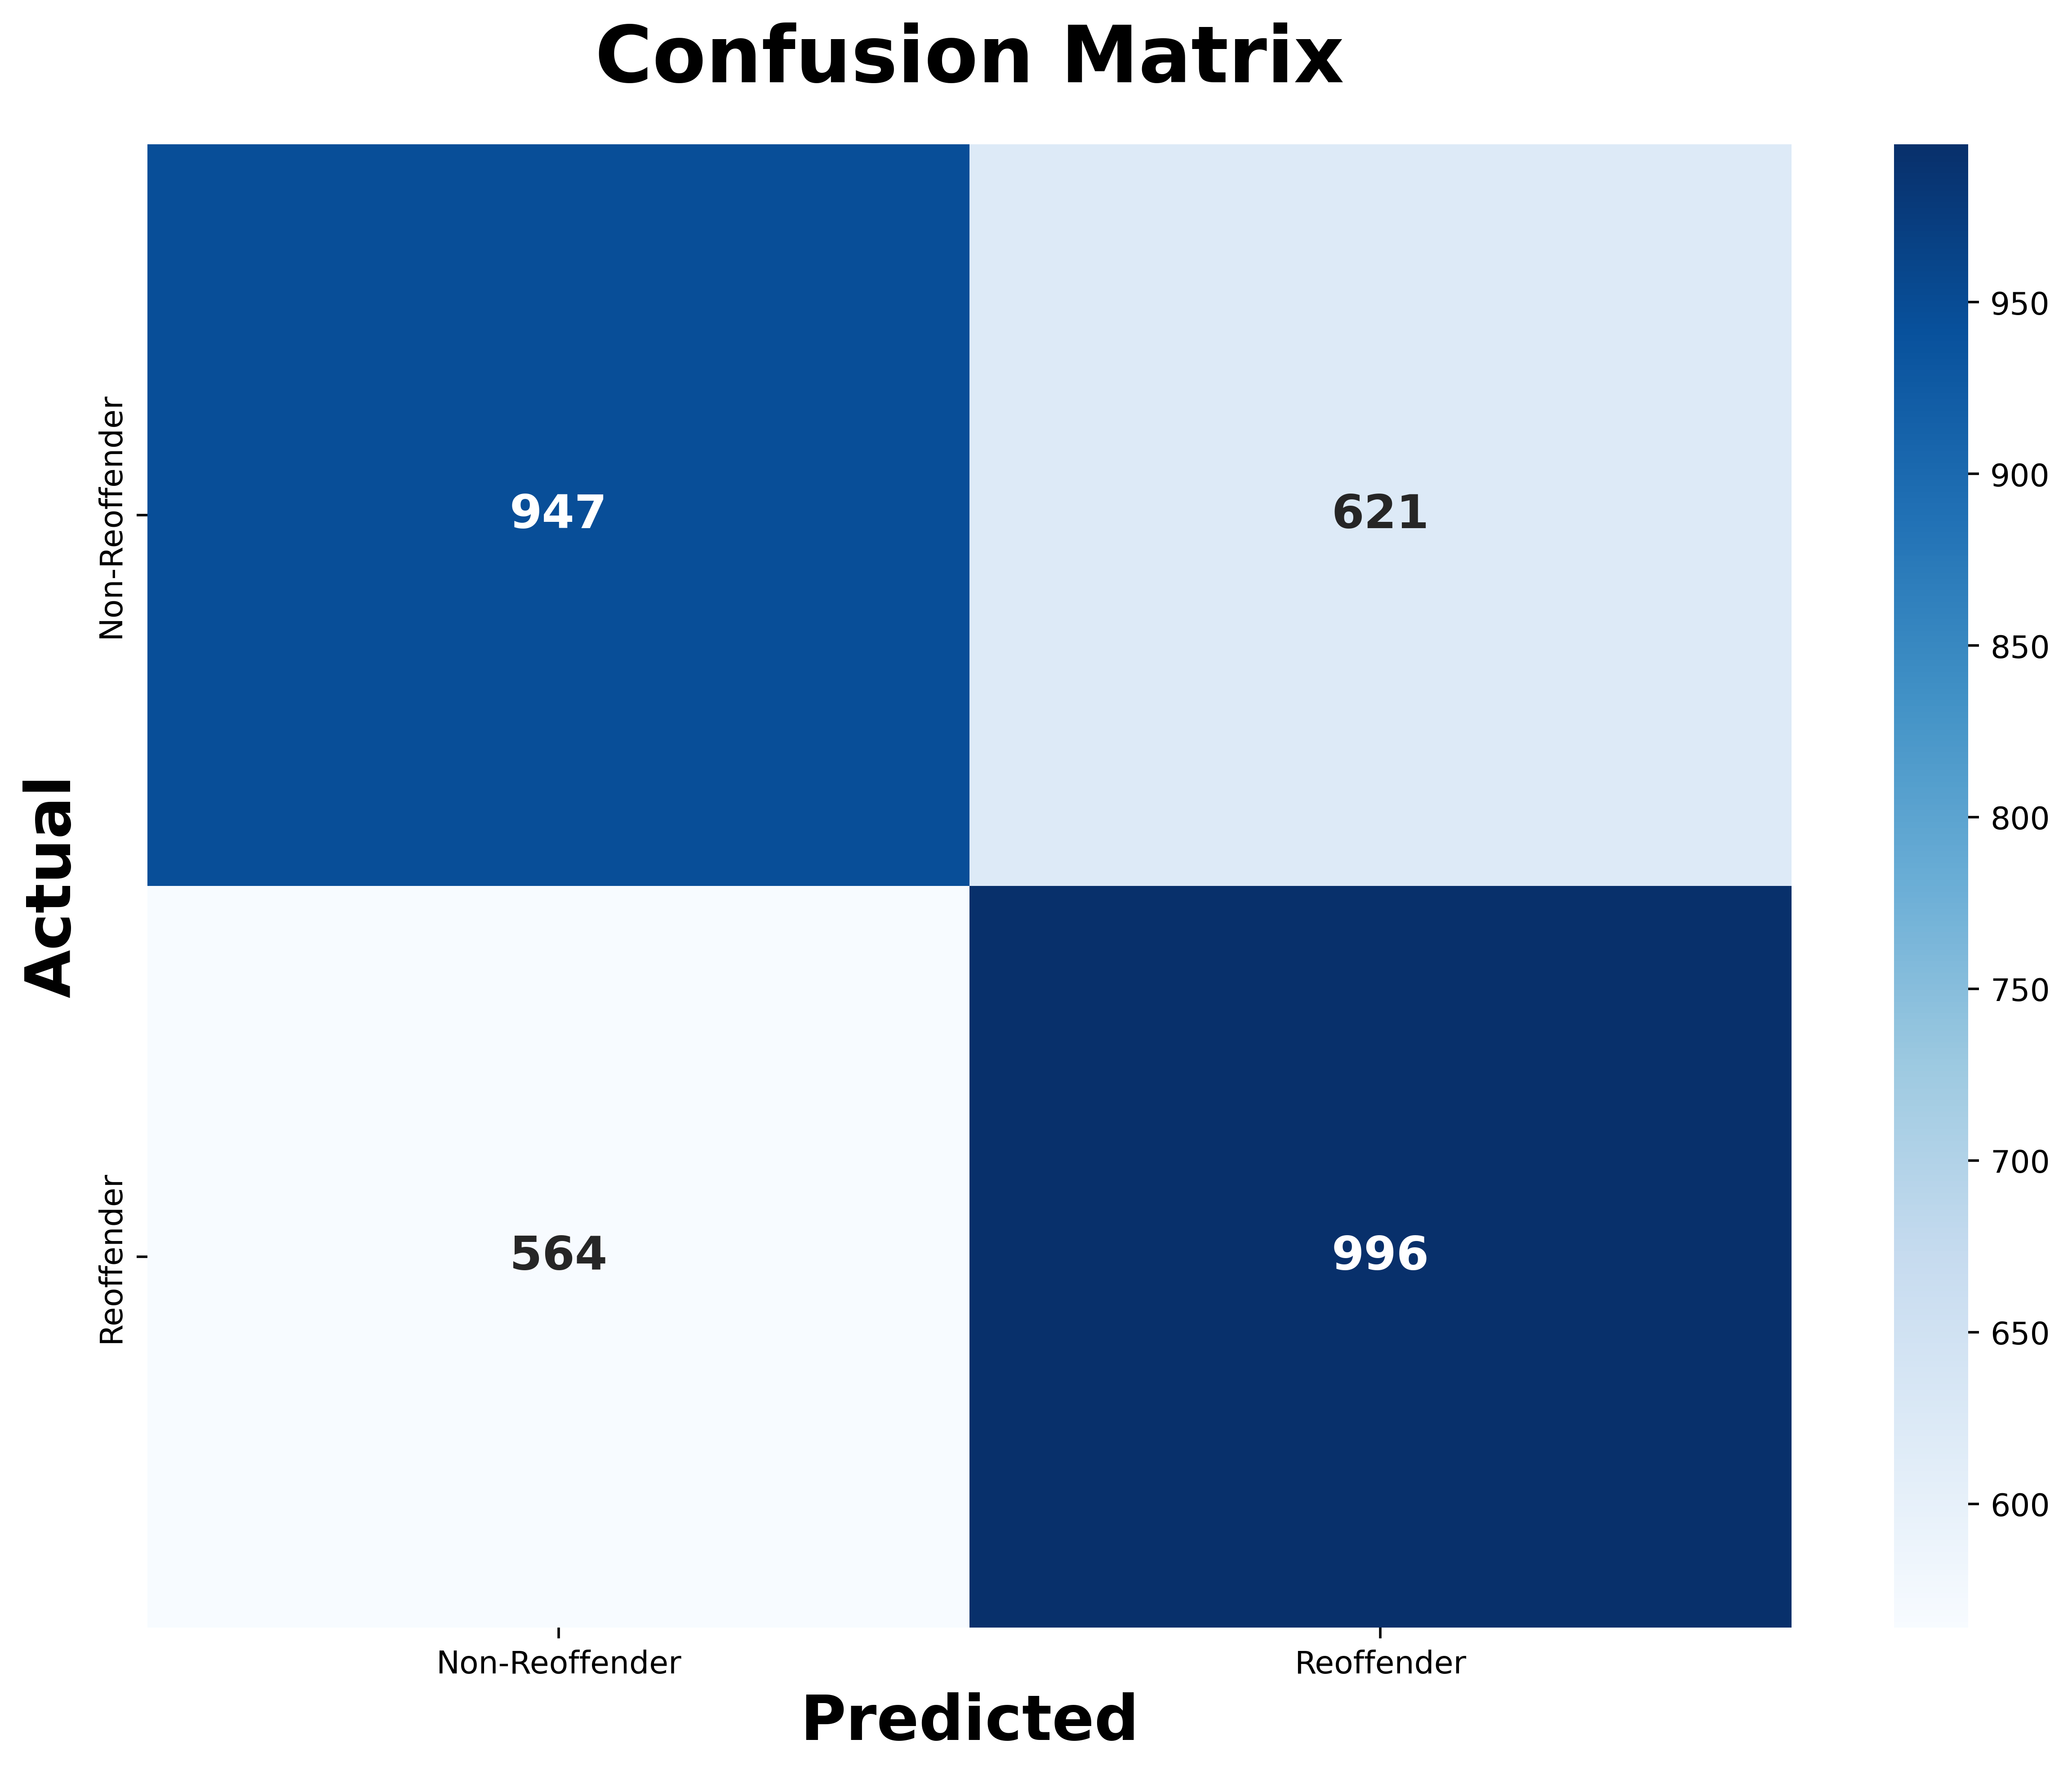

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=500)  # Added figsize and dpi for high resolution
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Reoffender', 'Reoffender'], 
            yticklabels=['Non-Reoffender', 'Reoffender'],
            annot_kws={"size": 15,
                       "weight": 'bold',
                       },
            )
plt.title("Confusion Matrix", fontsize=25, fontweight='bold', pad=20)
plt.xlabel("Predicted", fontsize=20, fontweight='bold')
plt.ylabel("Actual", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


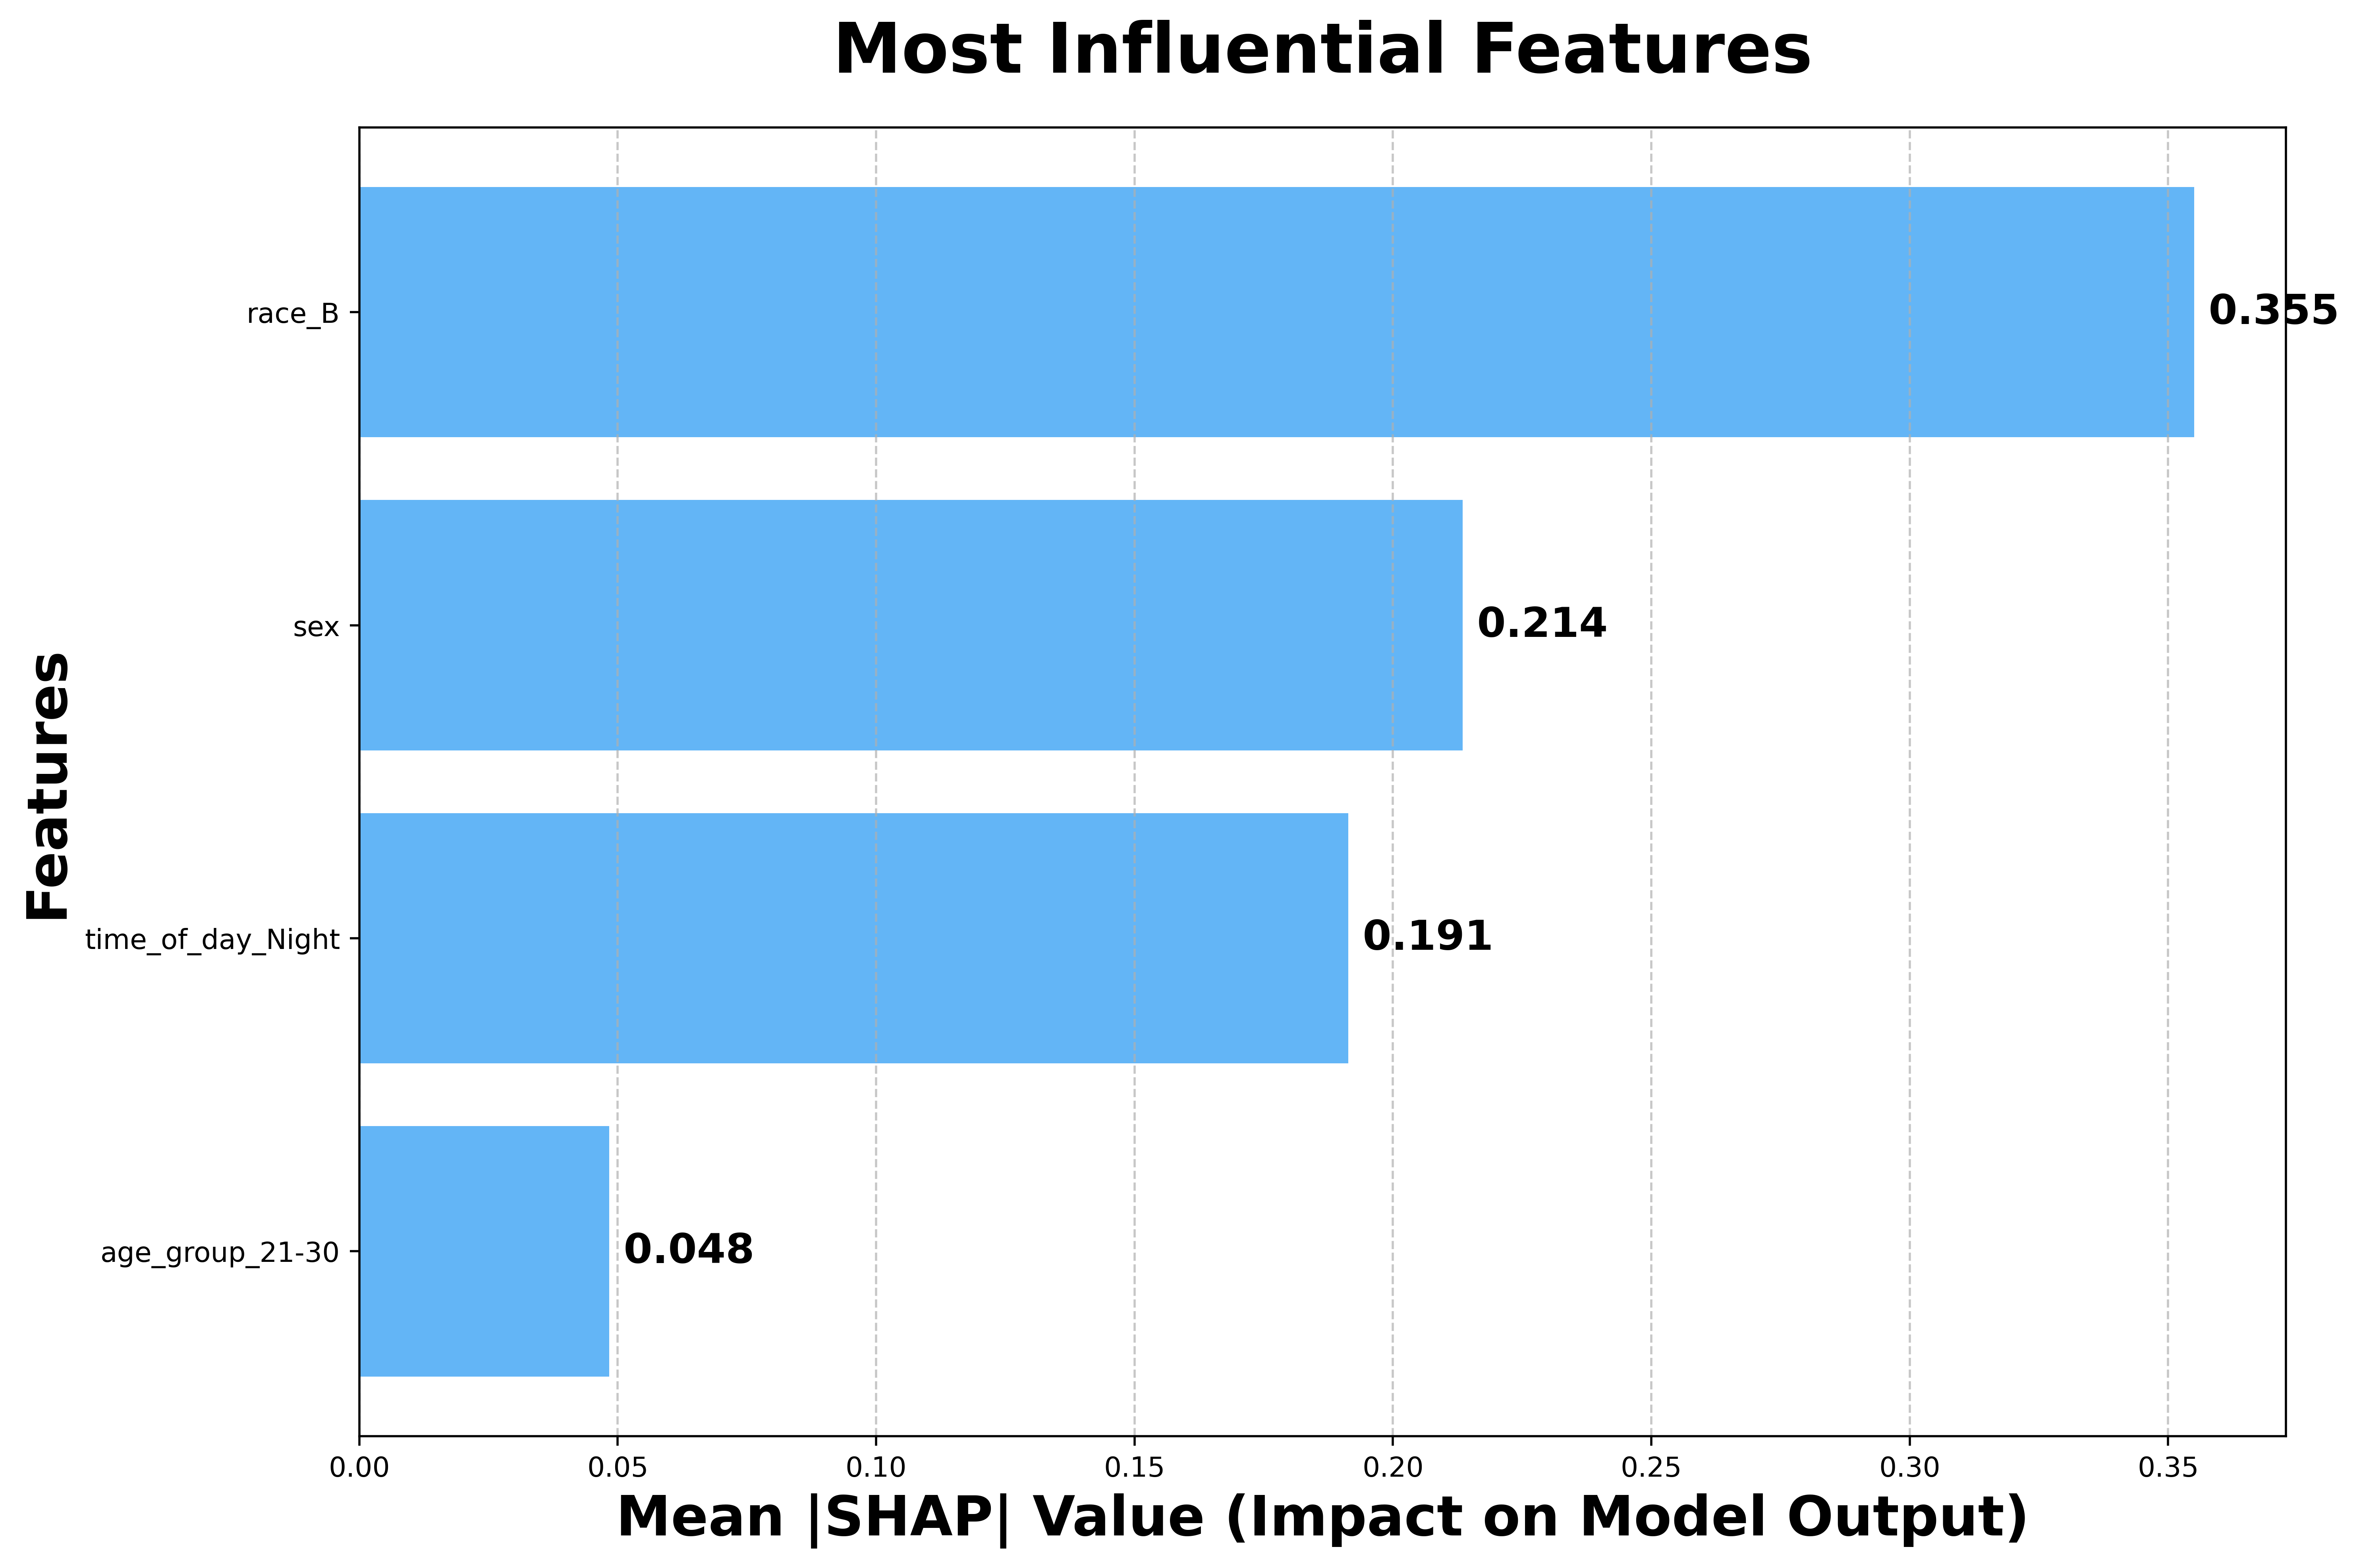

In [27]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import pandas as pd

# First encode the data
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the columns between train and test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Convert all columns to float64
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)

# Calculate SHAP values
shap_values = shap.TreeExplainer(xgb_best_model).shap_values(X_test_encoded)

# Create DataFrame of feature importance
shap_values_df = pd.DataFrame({
    'feature': X_test_encoded.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False).head(4)

# Get top 10 features
top_features = shap_values_df.sort_values(by='mean_abs_shap', ascending=False).head(10)

# Create high-resolution plot
plt.figure(figsize=(12, 8), dpi=500)

# Create horizontal bar plot
bars = plt.barh(top_features['feature'], 
                top_features['mean_abs_shap'],
                color='#2196F3',
                alpha=0.7)

# Customize plot
plt.xlabel("Mean |SHAP| Value (Impact on Model Output)", 
          fontsize=20, 
          fontweight='bold')
plt.title("Most Influential Features", 
         fontsize=25, 
         fontweight='bold', 
         pad=20)
plt.ylabel("Features", 
          fontsize=20,
          fontweight='bold')
plt.yticks(fontsize=10)

# Add value labels on bars
for i, v in enumerate(top_features['mean_abs_shap']):
    plt.text(v, i, f' {v:.3f}', 
             va='center', 
             fontsize=15,
             fontweight='bold'
             )

# Customize grid
plt.grid(axis='x', 
         linestyle='--', 
         alpha=0.7)

# Invert y-axis to show highest values at top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


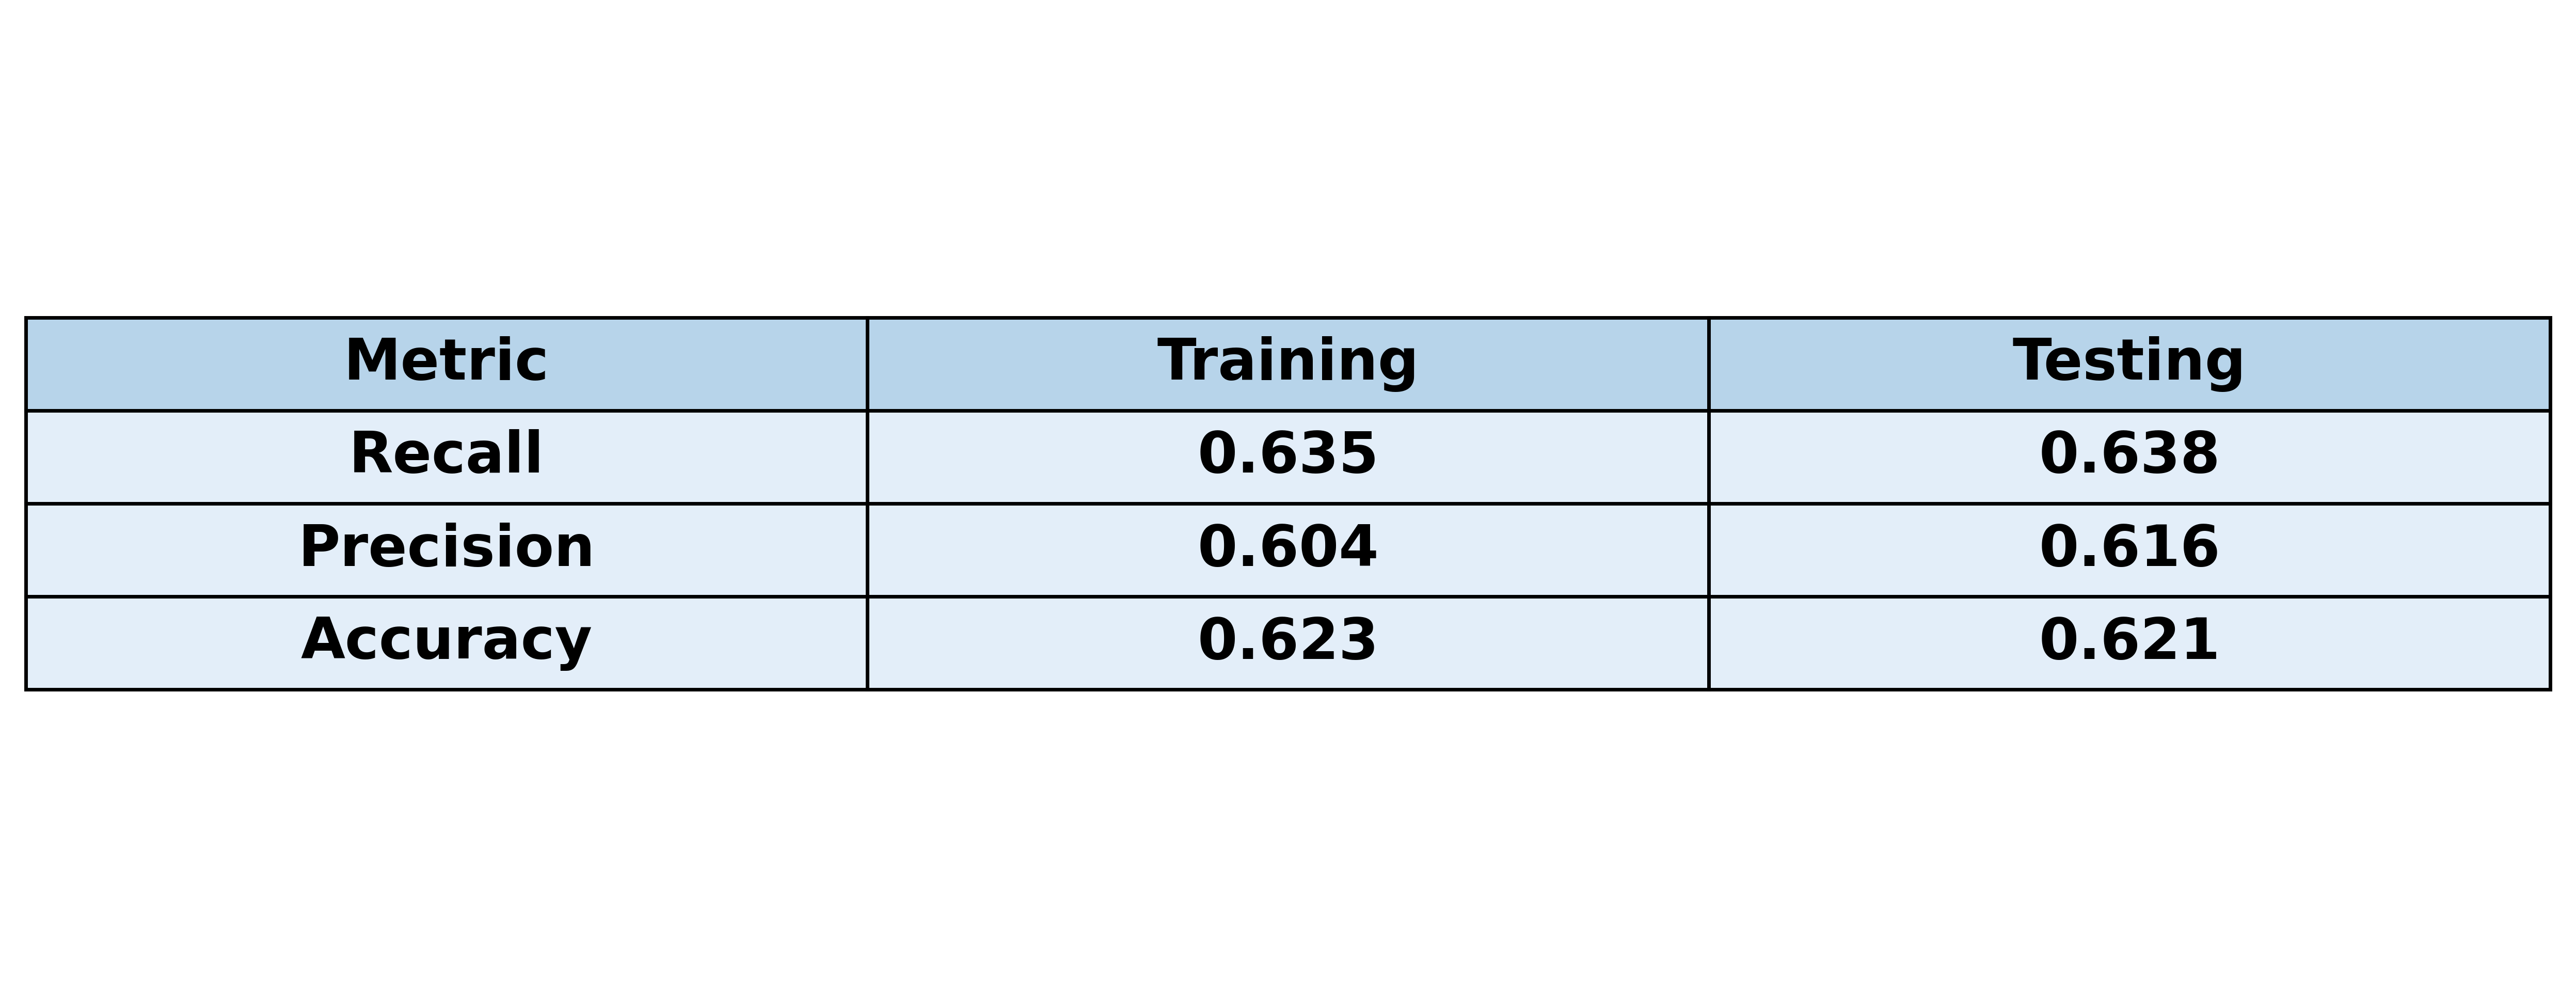

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

# Create DataFrame with metrics
metrics_data = {
    'Metric': ['Recall', 'Precision', 'Accuracy'],
    'Training': [
        f"{recall_score(y_train, train_pred):.3f}",
        f"{precision_score(y_train, train_pred):.3f}",
        f"{accuracy_score(y_train, train_pred):.3f}"
    ],
    'Testing': [
        f"{recall_score(y_test, test_pred):.3f}",
        f"{precision_score(y_test, test_pred):.3f}",
        f"{accuracy_score(y_test, test_pred):.3f}"
    ]
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4), dpi=500)

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=[[metrics_data['Metric'][i], 
                           metrics_data['Training'][i],
                           metrics_data['Testing'][i]] for i in range(3)],
                colLabels=['Metric', 'Training', 'Testing'],
                loc='center',
                cellLoc='center',
                colColours=[cm.Blues(0.3)]*3,  # Header color
                cellColours=[[cm.Blues(0.1)]*3 for _ in range(3)])  # Cell color

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1.2, 1.8)  # Adjust table size

# Customize table styles
for cell in table._cells:
    table._cells[cell].set_text_props(weight='bold')
    table._cells[cell].set_edgecolor('#000000')

# Add title
# plt.title('Model Performance Metrics', 
#           fontsize=25, 
#           fontweight='bold')

plt.tight_layout()
plt.show()
